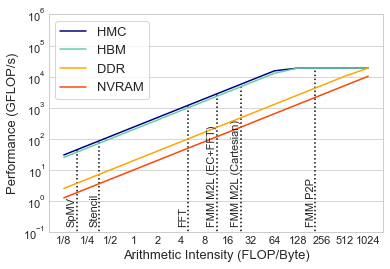

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D

fig, ax = plt.subplots()
# fig.set_size_inches(4, 3)
AI = [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]
axes = plt.gca()
axes.set_ylim([1e-1,1e6])
ax.set_xscale('log')
ax.set_yscale('log')

peak = 18.8e+03; # 2973
bw = [240,200,20,10]

AI_BW = np.multiply(bw[0],AI)
perf = np.minimum(AI_BW,peak)
line1, = ax.plot(AI, perf,label='HMC',color='navy') 

AI_BW = np.multiply(bw[1],AI)
perf = np.minimum(AI_BW,peak)
ax.plot(AI, perf,label='HBM',color='mediumaquamarine') 

AI_BW = np.multiply(bw[2],AI)
perf = np.minimum(AI_BW,peak)
ax.plot(AI, perf,label='DDR',color='orange') 

AI_BW = np.multiply(bw[3],AI)
perf = np.minimum(AI_BW,peak)
ax.plot(AI, perf,label='NVRAM',color='orangered') 

AI_BW = np.multiply(bw[0],AI)
perf = np.minimum(AI_BW,peak)
y_min=0.15;
x_value=4.8773;
y_value = np.interp(x_value, AI, perf);
plt.vlines(x=x_value, ymin=0, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-1.2,y_min,'FFT',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=211.3476;
y_value = np.interp(x_value, AI, perf);
plt.vlines(x=x_value, ymin=0, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-50,y_min,'FMM P2P',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=23.5898;
y_value = np.interp(x_value, AI, perf);
plt.vlines(x=x_value, ymin=0, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-6,y_min,'FMM M2L (Cartesian)',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=11.8024;
y_value = np.interp(x_value, AI, perf);
plt.vlines(x=x_value, ymin=0, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-3,y_min,'FMM M2L (EC+FFT)',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=0.1849;
y_value = np.interp(x_value, AI, perf);
plt.vlines(x=x_value, ymin=0, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-0.05,y_min,'SpMV',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=0.3549;
y_value = np.interp(x_value, AI, perf);
plt.vlines(x=x_value, ymin=0, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-0.09,y_min,'Stencil',rotation=90, fontsize=11,verticalalignment='bottom')

sns.set_context(rc={"font.size":11})   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
ax.set_xticklabels(['1/8','1/4','1/2','1','2','4','8','16','32','64','128','256','512','1024'])
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xticks(AI)                                                       
ax.set_ylabel('Performance (GFLOP/s)',size=13)
ax.set_xlabel('Arithmetic Intensity (FLOP/Byte)',size=13)

legend = plt.legend(fontsize=13,loc='best',frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
sns.set_style("whitegrid")
ax.xaxis.grid(False)
ax.yaxis.grid(True)
plt.show()
fig = ax.get_figure()
fig.savefig('memory.pdf',bbox_inches='tight')